# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [245]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

## Cargar datos

In [246]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')



## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [247]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [248]:
# Imprime una muestra de los datos para las tarifas
df_plans.head(10)



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Es un data set muy breve donde se muestra el detalle de ambos planes cada columna está en el formato que debe estar y no hay datos nulos

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [249]:
#corregiremos la unidad de medida de consumo de internet a continuación

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [250]:
#hacemos el cambio de mb_per_month a gb 

df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
df_plans.drop(columns='mb_per_month_included', inplace=True)
df_plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


## Usuarios/as

In [251]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [252]:
# Imprime una muestra de datos para usuarios

df_users.head(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Para este data frame si vendrían bien algunos cambios, empezando por las fechas, están en formato object, podriamos pasarlas a formato datetime y ponerlas como dd/mm/aa como dice el diccionario, para los valores nulos de la columna churn_date, los dejaremos así, pero añadiremos una columna boleana a un lado que nos dará un valor boleano cuando el usuario esté activo (que es a lo que se refiere el valor nulo, que la cuenta sigue activa) 


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [253]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date']) #cambiamos las columnas con fechas de object a datetime
df_users['is_active'] = df_users['churn_date'].isna() #agregamos una columna boleana que nos dirá si el usuario sigue activo 

In [254]:
df_users.head(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,True
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,False
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,True
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,True
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,True


## Llamadas

In [255]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [256]:
# Imprime una muestra de datos para las llamadas
df_calls.head(20)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [257]:
#quitamos el _ del id y convertimos a int para identificarlo más facilmente
df_calls['id'] = df_calls['id'].astype(str)
df_calls['id'] =df_calls['id'].str.replace('_','').astype(int)
df_calls['duration'] = np.ceil(df_calls['duration']) #agregamos correción del revisor
df_calls.info()

# convertimos las fechas a datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  int64  
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [258]:
#aclaramos que la duración es en minutos
df_calls.rename(columns={'duration':'call_duration_in_minutes'}, inplace=True)
df_calls.head(10)

,id,user_id,call_date,call_duration_in_minutes
0,100093,1000,2018-12-27,9.0
1,1000145,1000,2018-12-27,14.0
2,1000247,1000,2018-12-27,15.0
3,1000309,1000,2018-12-28,6.0
4,1000380,1000,2018-12-30,5.0
5,1000388,1000,2018-12-31,3.0
6,1000510,1000,2018-12-27,6.0
7,1000521,1000,2018-12-28,15.0
8,1000530,1000,2018-12-28,6.0
9,1000544,1000,2018-12-26,5.0


## Mensajes

In [259]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [260]:
# Imprime una muestra de datos para los mensajes
df_messages.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [261]:
#quitamos el _ del id y convertimos a int y ponemos un nombre más claro 
df_messages['id'] = df_messages['id'].astype(str)
df_messages['id'] =df_messages['id'].str.replace('_','').astype(int)
df_messages.rename(columns={'id': 'message_id'}, inplace=True)
df_messages.head(10)
#para fechas
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])


## Internet

In [262]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [263]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [264]:
#quitamos el _ del id y convertimos a int para identificarlo más facilmente
df_internet['id'] = df_internet['id'].astype(str)
df_internet['id'] =df_internet['id'].str.replace('_','').astype(int)
#fechas
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  int64         
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 MB


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [265]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   minutes_included       2 non-null      int64  
 2   usd_monthly_pay        2 non-null      int64  
 3   usd_per_gb             2 non-null      int64  
 4   usd_per_message        2 non-null      float64
 5   usd_per_minute         2 non-null      float64
 6   plan_name              2 non-null      object 
 7   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [266]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
#creamos una columna con año y mes
df_calls['month'] = df_calls['call_date'].dt.to_period('m')
#agrupamos por usuario y mes y hacemos la suma de todo 
monthly_minutes = df_calls.groupby(['user_id', 'month'])['call_duration_in_minutes'].sum().reset_index()
#aseguramos que el formato de fecha esté correcto . 
monthly_minutes['month'] = monthly_minutes['month'].astype(str)
print(monthly_minutes.head())

   user_id    month  call_duration_in_minutes
0     1000  2018-12                     124.0
1     1001  2018-08                     182.0
2     1001  2018-09                     315.0
3     1001  2018-10                     393.0
4     1001  2018-11                     426.0


In [267]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# crear columna con año y mes
df_messages['month'] = df_messages['message_date'].dt.to_period('M')
# agrupamos por usuario y mes 
monthly_messages = df_messages.groupby(['user_id', 'month'])['message_id'].count().reset_index()
#aseguramos formato de fecha 
monthly_messages['month'] = monthly_messages['month'].astype(str)
# renombramos la columna 
monthly_messages.rename(columns={'message_id': 'total_messages'}, inplace=True)

print(monthly_messages.head())

   user_id    month  total_messages
0     1000  2018-12              11
1     1001  2018-08              30
2     1001  2018-09              44
3     1001  2018-10              53
4     1001  2018-11              36


In [268]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# extraemos el mes en formato 'aaaa-mm'
df_internet['month'] = df_internet['session_date'].dt.to_period('M').astype(str)
# agrupamos por usuario y mes y sumamos los mb
internet_monthly = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
#correción del revisor, cambiamos a gb y redondeamos
internet_monthly['total_gb_used'] = np.ceil(internet_monthly['mb_used'] / 1024)
#aseguramos formato
internet_monthly['month'] = internet_monthly['month'].astype(str)
internet_monthly.drop(columns='mb_used', inplace=True)

internet_monthly.head()


,user_id,month,total_gb_used
0,1000,2018-12,2.0
1,1001,2018-08,7.0
2,1001,2018-09,14.0
3,1001,2018-10,22.0
4,1001,2018-11,19.0


In [269]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
#llamadas y mensajes 
usage = monthly_minutes.merge(monthly_messages, on = ['user_id','month'], how='outer')
#agregamos internet
usage = usage.merge(internet_monthly, on=['user_id', 'month'], how='outer')
#cambiamos datos ausentes a 0 
usage.fillna(0,inplace=True)

usage.head()

,user_id,month,call_duration_in_minutes,total_messages,total_gb_used
0,1000,2018-12,124.0,11.0,2.0
1,1001,2018-08,182.0,30.0,7.0
2,1001,2018-09,315.0,44.0,14.0
3,1001,2018-10,393.0,53.0,22.0
4,1001,2018-11,426.0,36.0,19.0


In [270]:
# Añade la información de la tarifa
#añadimos el nombre del plan 
usage= usage.merge(df_users[['user_id','plan']], on='user_id',how='left')
#añadimos detalles del plan
usage = usage.merge(df_plans, left_on='plan', right_on='plan_name', how='left')

usage.head()


,user_id,month,call_duration_in_minutes,total_messages,total_gb_used,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,2018-12,124.0,11.0,2.0,ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,2018-08,182.0,30.0,7.0,surf,50,500,20,10,0.03,0.03,surf,15.0
2,1001,2018-09,315.0,44.0,14.0,surf,50,500,20,10,0.03,0.03,surf,15.0
3,1001,2018-10,393.0,53.0,22.0,surf,50,500,20,10,0.03,0.03,surf,15.0
4,1001,2018-11,426.0,36.0,19.0,surf,50,500,20,10,0.03,0.03,surf,15.0


In [271]:
# Calcula el ingreso mensual para cada usuario
#excedente de minutos, generamos una condicional para que transforme los valores negativos a cero y solo nos muestre algún dato cuando hay excedentes
usage['excess_minutes'] = usage['call_duration_in_minutes'] - usage['minutes_included']
usage['excess_minutes'] = [0 if value < 0 else value for value in usage['excess_minutes']]
usage.head(10)

,user_id,month,call_duration_in_minutes,total_messages,total_gb_used,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,excess_minutes
0,1000,2018-12,124.0,11.0,2.0,ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,0.0
1,1001,2018-08,182.0,30.0,7.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0
2,1001,2018-09,315.0,44.0,14.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0
3,1001,2018-10,393.0,53.0,22.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0
4,1001,2018-11,426.0,36.0,19.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0
5,1001,2018-12,412.0,44.0,19.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0
6,1002,2018-10,59.0,15.0,7.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0
7,1002,2018-11,386.0,32.0,19.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0
8,1002,2018-12,384.0,41.0,15.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0
9,1003,2018-12,1104.0,50.0,27.0,surf,50,500,20,10,0.03,0.03,surf,15.0,604.0


In [272]:
# excedente de mensajes
usage['excess_messages'] = usage['total_messages'] - usage['messages_included']
usage['excess_messages'] = [0 if value < 0 else value for value in usage['excess_messages']]
usage.head(10)

,user_id,month,call_duration_in_minutes,total_messages,total_gb_used,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,excess_minutes,excess_messages
0,1000,2018-12,124.0,11.0,2.0,ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0
1,1001,2018-08,182.0,30.0,7.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.0
2,1001,2018-09,315.0,44.0,14.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.0
3,1001,2018-10,393.0,53.0,22.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,3.0
4,1001,2018-11,426.0,36.0,19.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.0
5,1001,2018-12,412.0,44.0,19.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.0
6,1002,2018-10,59.0,15.0,7.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.0
7,1002,2018-11,386.0,32.0,19.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.0
8,1002,2018-12,384.0,41.0,15.0,surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.0
9,1003,2018-12,1104.0,50.0,27.0,surf,50,500,20,10,0.03,0.03,surf,15.0,604.0,0.0


In [273]:
#excedente datos en gb
usage['excess_data'] = usage['total_gb_used'] - usage['gb_per_month_included']
usage['excess_data'] = [0 if value < 0 else value for value in usage['excess_data']]
usage.drop(columns='gb_per_month_included', inplace=True)
usage.head(10)

,user_id,month,call_duration_in_minutes,total_messages,total_gb_used,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,excess_minutes,excess_messages,excess_data
0,1000,2018-12,124.0,11.0,2.0,ultimate,1000,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0
1,1001,2018-08,182.0,30.0,7.0,surf,50,500,20,10,0.03,0.03,surf,0.0,0.0,0.0
2,1001,2018-09,315.0,44.0,14.0,surf,50,500,20,10,0.03,0.03,surf,0.0,0.0,0.0
3,1001,2018-10,393.0,53.0,22.0,surf,50,500,20,10,0.03,0.03,surf,0.0,3.0,7.0
4,1001,2018-11,426.0,36.0,19.0,surf,50,500,20,10,0.03,0.03,surf,0.0,0.0,4.0
5,1001,2018-12,412.0,44.0,19.0,surf,50,500,20,10,0.03,0.03,surf,0.0,0.0,4.0
6,1002,2018-10,59.0,15.0,7.0,surf,50,500,20,10,0.03,0.03,surf,0.0,0.0,0.0
7,1002,2018-11,386.0,32.0,19.0,surf,50,500,20,10,0.03,0.03,surf,0.0,0.0,4.0
8,1002,2018-12,384.0,41.0,15.0,surf,50,500,20,10,0.03,0.03,surf,0.0,0.0,0.0
9,1003,2018-12,1104.0,50.0,27.0,surf,50,500,20,10,0.03,0.03,surf,604.0,0.0,12.0


In [274]:
#hacemos el calculo de ingresos con los excedentes 
usage['income_from_minutes'] = usage['excess_minutes'] * usage['usd_per_minute']
usage['income_from_messages'] = usage['excess_messages'] * usage['usd_per_message']
usage['income_from_data'] = usage['excess_data'] * usage['usd_per_gb']

#calculamos el ingreso total sumando el ingreso por excedentes y la tarifa mensual base
usage['total_income'] = usage['income_from_minutes'] + usage['income_from_messages'] + usage['income_from_data'] + usage['usd_monthly_pay']

usage[['user_id','month','total_income']].head(10)

,user_id,month,total_income
0,1000,2018-12,70.00
1,1001,2018-08,20.00
2,1001,2018-09,20.00
3,1001,2018-10,90.09
4,1001,2018-11,60.00
5,1001,2018-12,60.00
6,1002,2018-10,20.00
7,1002,2018-11,60.00
8,1002,2018-12,20.00
9,1003,2018-12,158.12


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

  plan_name    month  call_duration_in_minutes
0      surf  2018-01                203.000000
1      surf  2018-02                297.000000
2      surf  2018-03                330.000000
3      surf  2018-04                351.540000
4      surf  2018-05                399.584416


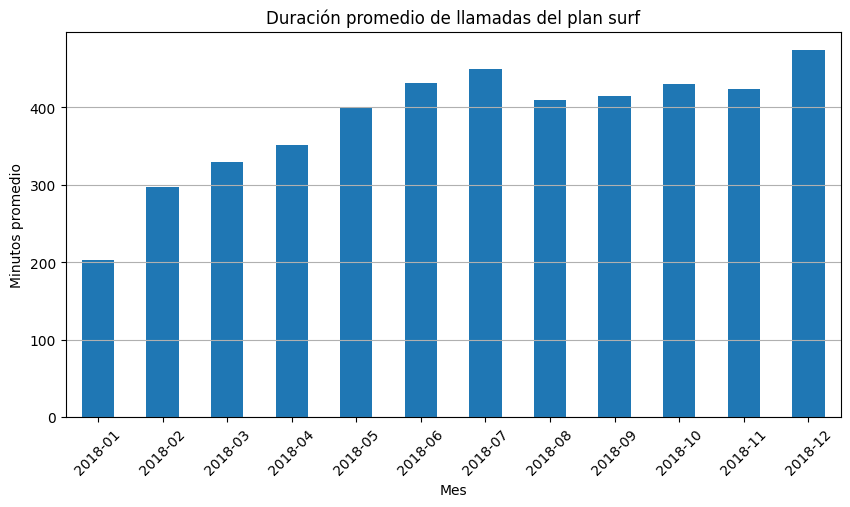

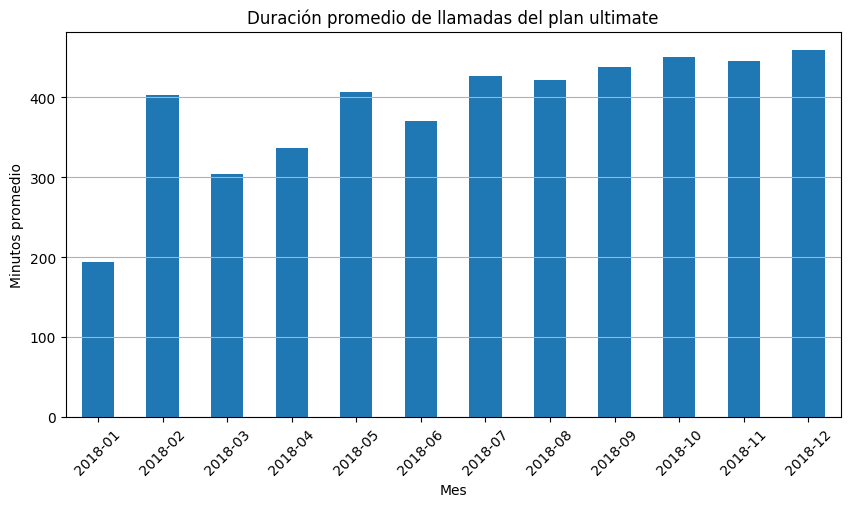

In [275]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
calls_grouped = usage.groupby(['plan_name', 'month'])['call_duration_in_minutes'].mean().reset_index()


print(calls_grouped.head())

#generamos g´rafico por plan y luego los filtramos
for plan in calls_grouped['plan_name'].unique():
    plan_data = calls_grouped[calls_grouped['plan_name'] == plan]
#grafico
    plan_data.plot(
        x='month', 
        y='call_duration_in_minutes', 
        kind='bar', 
        legend=False, 
        title=f'Duración promedio de llamadas del plan {plan}',
        figsize=(10, 5)
    )
    
    plt.ylabel('Minutos promedio')
    plt.xlabel('Mes')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

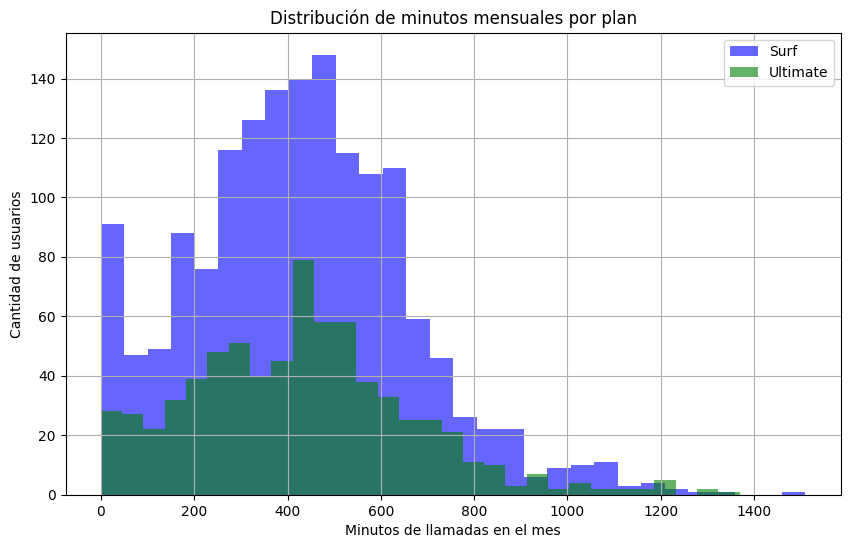

In [276]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#filtramos los planes 
surf_minutes = usage[usage['plan_name'] == 'surf']['call_duration_in_minutes']
ultimate_minutes = usage[usage['plan_name'] == 'ultimate']['call_duration_in_minutes']


#creamos graficos
plt.figure(figsize=(10, 6))
usage[usage['plan_name'] == 'surf']['call_duration_in_minutes'].plot(
    kind='hist', bins=30, alpha=0.6, label='Surf', color='blue')
usage[usage['plan_name'] == 'ultimate']['call_duration_in_minutes'].plot(
    kind='hist', bins=30, alpha=0.6, label='Ultimate', color='green')
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos de llamadas en el mes')
plt.ylabel('Cantidad de usuarios')
plt.legend()
plt.grid(True)
plt.show()

In [277]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_variance = usage.groupby('plan_name')['call_duration_in_minutes'].agg(['mean', 'var'])
print(mean_variance)


                 mean           var
plan_name                          
surf       428.749523  54968.279461
ultimate   430.450000  57844.464812


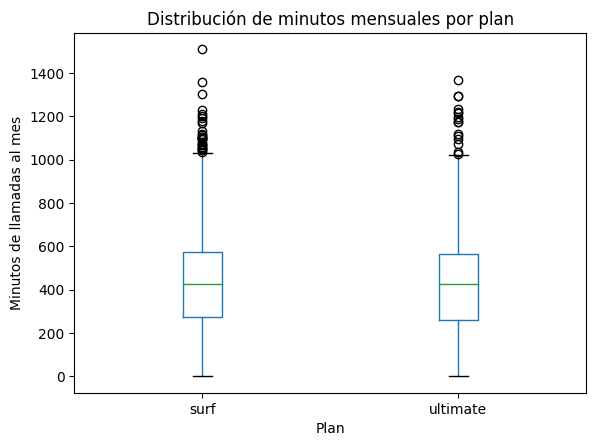

In [278]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

usage.boxplot(column='call_duration_in_minutes', by='plan_name', grid=False)
plt.title('Distribución de minutos mensuales por plan')
plt.suptitle('')  
plt.xlabel('Plan')
plt.ylabel('Minutos de llamadas al mes')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]


aunque el comportamiento de los usuarios respecto al número de minutos usados al mes es bastante similar entre ambos planes, podemos observar que los usuarios del plan ultimate tienden a utilizar más sus minutos en llamadas, tal vez porque su plan tiene más minutos incluidos deciden aprovecharlos, aunque en ambos planes podemos observar algunos valores atipicos que están mucho más arriba que la mayoría. 

### Mensajes

plan_name
surf        31.159568
ultimate    37.551389
Name: total_messages, dtype: float64


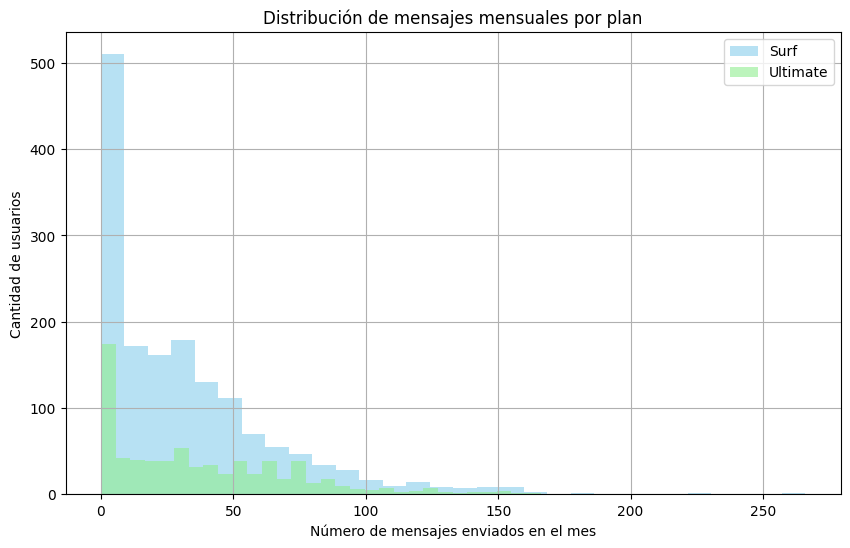

In [279]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
average_messages_per_plan = usage.groupby('plan_name')['total_messages'].mean()

print(average_messages_per_plan)

#elaboramos gráficos
plt.figure(figsize=(10, 6))
usage[usage['plan_name'] == 'surf']['total_messages'].plot(
    kind='hist', bins=30, alpha=0.6, label='Surf', color='skyblue')
usage[usage['plan_name'] == 'ultimate']['total_messages'].plot(
    kind='hist', bins=30, alpha=0.6, label='Ultimate', color='lightgreen')
plt.title('Distribución de mensajes mensuales por plan')
plt.xlabel('Número de mensajes enviados en el mes')
plt.ylabel('Cantidad de usuarios')
plt.legend()
plt.grid(True)
plt.show()




Los usuarios del plan ultimate envian un promedio de 37.55 mensajes por mes y los del plan surf de 31.16, aunque los usuarios del plan ultimate en promedio envian más mensajes, la diferencia no es tan significativa, lo cual podria ser un indicador que el plan no define el número de mensajes enviados 

### Internet

plan_name
surf        16.670693
ultimate    17.306944
Name: total_gb_used, dtype: float64


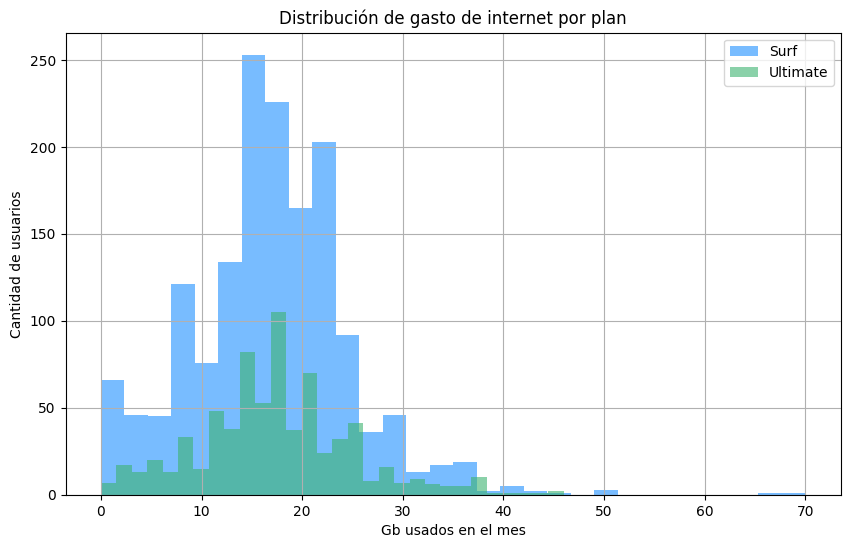

In [280]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
average_internet_per_plan = usage.groupby('plan_name')['total_gb_used'].mean()

print(average_internet_per_plan)

#creamos gráficos 
plt.figure(figsize=(10, 6))
usage[usage['plan_name'] == 'surf']['total_gb_used'].plot(
    kind='hist', bins=30, alpha=0.6, label='Surf', color='dodgerblue')
usage[usage['plan_name'] == 'ultimate']['total_gb_used'].plot(
    kind='hist', bins=30, alpha=0.6, label='Ultimate', color='mediumseagreen')
plt.title('Distribución de gasto de internet por plan')
plt.xlabel('Gb usados en el mes')
plt.ylabel('Cantidad de usuarios')
plt.legend()
plt.grid(True)
plt.show()



Mismo caso que con los mensajes la diferencia no es significativa entre un plan y el otro(en consumo de internet), lo cual nos sugiere que el plan no define la cantidad de internet que utilizan. En cantidad de usuarios si vemos un volumen mucho mayor en el plan surf

## Ingreso

In [281]:
#agrupamos por plan y calculamos el ingreso mensual 
income_stats = usage.groupby('plan_name')['usd_monthly_pay'].agg(['mean', 'median', 'var', 'std'])

print(income_stats)

           mean  median  var  std
plan_name                        
surf         20      20    0  0.0
ultimate     70      70    0  0.0


In [282]:
#ingreso promedio por plan
average_income_per_plan = usage.groupby('plan_name')['usd_monthly_pay'].mean()

print(average_income_per_plan)

plan_name
surf        20
ultimate    70
Name: usd_monthly_pay, dtype: int64


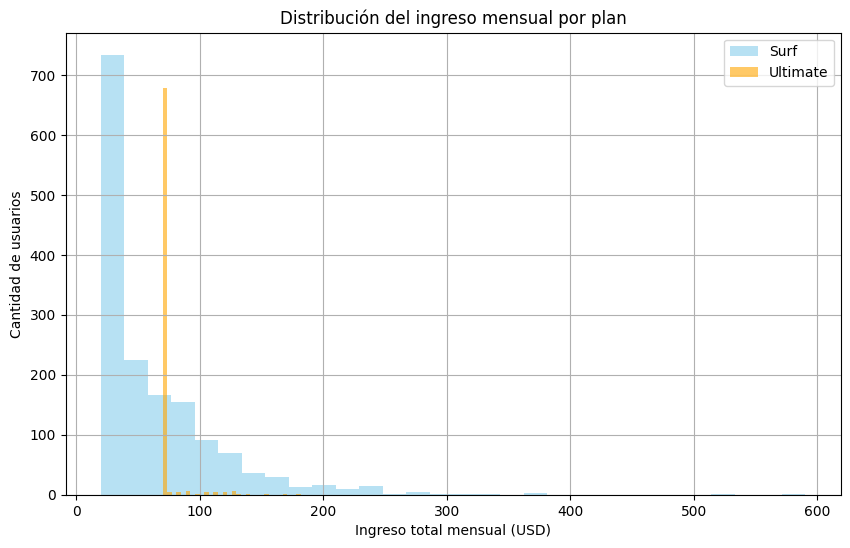

In [283]:
plt.figure(figsize=(10, 6))

#plan surf
usage[usage['plan_name'] == 'surf']['total_income'].plot(
    kind='hist', bins=30, alpha=0.6, label='Surf', color='skyblue')

#plan ultimate
usage[usage['plan_name'] == 'ultimate']['total_income'].plot(
    kind='hist', bins=30, alpha=0.6, label='Ultimate', color='orange')

plt.title('Distribución del ingreso mensual por plan')
plt.xlabel('Ingreso total mensual (USD)')
plt.ylabel('Cantidad de usuarios')
plt.legend()
plt.grid(True)
plt.show()

Se realizaron las gráficas para cada uno de los puntos pedidos y la interpretación de cada uno 



podemos ver que ultimate es un plan de ingreso alto por usuario mientras que el plan surf es un plan economico, problemente cuyo fuerte es la venta en volumen. (El cual su ingreso está mayormente acumulado a la izquierda del gráfico mientras que el plan ultimate su cantidad de usuarios más alta se encuentra más a la derecha) 

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis
#Hipótesis nula (Ho):Los ingresos promedio de los usuarios de los planes ultimate y surf son iguales
#Hipótesis alternativa (H1): Los ingresos promedio de los usuarios de los planes ultimate y surf son diferentes

#filtramos ingresos por plan
ultimate_income = usage[usage['plan'] == 'ultimate']['total_income']
surf_income = usage[usage['plan'] == 'surf']['total_income']

#hacemos prueba t sin asumir varianzas iguales
t_stat, p_value = st.ttest_ind(ultimate_income, surf_income, equal_var=False)

#resultados
print(f't student: {t_stat:.3f}')
print(f'p value: {p_value:.3f}')

alpha = 0.05 #alpha estandar de 5%
if p_value < alpha:
    print("Rechazamos la Ho: Hay una diferencia significativa entre los ingresos de los planes Ultimate y Surf.")
else:
    print("No rechazamos la Ho: No hay diferencia significativa entre los ingresos de los planes Ultimate y Surf.")

In [ ]:
df_users

In [ ]:
# Prueba las hipótesis
#agregamos city al df de usage
merged_data = usage.merge(df_users[['user_id', 'city']], on='user_id', how='left')
#Hipótesis nula (Ho):El ingreso promedio de los usuarios de ny-nj es igual al ingreso promedio de los usuarios de otras regiones
#Hipótesis alternativa (H1):El ingreso promedio de los usuarios de ny-jy es diferente al de los usuarios de otras regiones
#dividimos ny y nj
ny_nj_income = merged_data[merged_data['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]['total_income']
other_income = merged_data[~merged_data['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]['total_income']


#prueba t sin asumir varianzas iguales 
t_stat, p_value = st.ttest_ind(ny_nj_income, other_income, equal_var=False)

#resultados
print(f't student: {t_stat:.3f}')
print(f'p value: {p_value:.3f}')

alpha = 0.05 #alpha estandar de 5%
if p_value < alpha:
    print("Rechazamos la Ho: Hay una diferencia significativa entre los ingresos de NY-NJ y otras regiones.")
else:
    print("No rechazamos la Ho: No hay diferencia significativa entre los ingresos de NY-NJ y otras regiones.")


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien aplicadas las pruebas estadísticas para comprobar si efectivamente se tiene una diferencia significativa entre los grupos
</div>

## Conclusión general


Comenzamos prerarando los datos, ajustando a los formatos correctos, corregimos valores ausentes y fechas. 
Creamos el df usage que nos sirvio para calcular varios datos y tener una visión más clara de lo solicitado en el proyecto. 
Realizamos el analisis de uso y facturación de los planes surf y ultimate, y notamos que aunque los usuario de ultimate realizan más llamadas
envian más mensajes y consumen más mb que los de el plan surf.
Aunque el plan ultimate es más caro, los usuarios de surf generan mayores cargos extra que elevan su gasto. 